In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install paddlepaddle-gpu
!pip install paddleocr
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!git clone https://github.com/PaddlePaddle/PaddleOCR
!pip install Roboflow
!pip install ultralytics

from paddleocr import PaddleOCR, draw_ocr
import cv2
import glob
import numpy as np # biblioteca com funções matemáticas
from imutils import contours # para ordenar contornos
from google.colab.patches import cv2_imshow # visualização de imagens
import os
from roboflow import Roboflow
from ultralytics import YOLO
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

rf = Roboflow(api_key="9M9eZwZT2EXz4Lmw2SsQ")
project = rf.workspace("utad-dqdey").project("licence-plates-identification")
dataset = project.version(4).download("yolov8")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2024-02-08 19:42:05--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.81, 185.125.190.36, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb.1’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M   751KB/s    in 1.5s    

2024-02-08 19:42:07 (751 KB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb.1’ saved [1128092/1128092]

(Reading database ... 121756 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) over (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd

In [ ]:
model_best = YOLO("/content/pdi_best.pt")
test = model_best.predict(source = "/content/Licence-plates-identification-4/test/images", conf = 0.75, save = True, save_txt = True)


image 1/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527.jpg: 640x640 1 licence-plates, 10.0ms
image 2/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113.jpg: 640x640 1 licence-plates, 7.9ms
image 3/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af.jpg: 640x640 1 licence-plates, 7.3ms
image 4/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db.jpg: 640x640 1 licence-plates, 7.3ms
image 5/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6.jpg: 640x640 1 licence-plates, 7.3ms
image 6/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at

In [ ]:
dir_labels = "/content/runs/detect/predict2/labels/*.txt"
dir_images = "/content/runs/detect/predict2/*.jpg"

label_paths = []

for label in sorted(glob.iglob(dir_labels)):
  label_paths.append(label)

label_paths

[]

In [ ]:
label_names = []

for path in label_paths:
  split_path = path.split("/")
  path_name = split_path[-1]
  path_name = path_name.replace(".txt", "")

  label_names.append(path_name)

label_names

[]

In [ ]:
image_paths = []

for image in sorted(glob.iglob(dir_images)):
  image_paths.append(image)

image_paths

[]

In [ ]:
images_names = []

for image in image_paths:
  split_image_name = image.split("/")
  image_name = split_image_name[-1]
  image_name = image_name.replace(".jpg", "")

  images_names.append(image_name)

images_names

[]

In [ ]:
counter_images = 0
counter_labels = 0

for i in range(0, len(image_paths)):

  if images_names[i] in label_names:

    img = cv2.imread(image_paths[i])

    height = img.shape[0]
    width = img.shape[1]

    f = open(label_paths[counter_labels])

    lines = f.readlines()

    for line in lines:
      l = line.replace("\n", "")

      l_split = l.split(" ")

      coords = [float(l_split[1]), float(l_split[2]), float(l_split[3]), float(l_split[4])]

      des_x = coords[0] * width
      des_y = coords[1] * height
      des_width = coords[2] * width
      des_height = coords[3] * height

      box_thick = 4

      x_min = des_x - des_width / 2 + box_thick
      x_max = des_x + des_width - des_width / 2 - box_thick
      y_min = des_y - des_height + des_height / 2 + box_thick
      y_max = des_y + des_height - des_height / 2 - box_thick

      img_crop = img[int(y_min) : int (y_max), int(x_min) : int(x_max)]

      if not os.path.exists("/content/final_images/"):
        os.makedirs("/content/final_images/")
        print("folder created")

      cv2.imwrite("/content/final_images/"+ str(counter_images) + ".jpg", img_crop)
      counter_images = counter_images + 1

  f.close()

  counter_labels = counter_labels + 1

In [ ]:
dir_final_images = "/content/final_images/*.jpg"
final_image_paths = []

for image in sorted(glob.iglob(dir_final_images)):
  final_image_paths.append(image)

final_image_paths

[]

In [ ]:
ocr_model = PaddleOCR(lang = 'en', cls = True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 4.83MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:01<00:00, 9.96MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:04<00:00, 505kiB/s]

[2024/02/08 18:59:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [ ]:
model_best = YOLO("/content/pdi_best.pt")
test = model_best.predict(source = "/content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia", conf = 0.75, save = True, save_txt = True)


image 1/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro0.png: 448x640 (no detections), 98.9ms
image 2/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro1.png: 640x640 1 licence-plates, 31.9ms
image 3/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro10.png: 640x480 1 licence-plates, 72.9ms
image 4/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro100.png: 480x640 1 licence-plates, 60.1ms
image 5/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro101.png: 640x480 1 licence-plates, 8.6ms
image 6/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro102.png: 640x480 1 licence-plates, 7.2ms
image 7/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro103.png: 640x640 1 licence-plates, 8.2ms
image 8/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class

In [ ]:
dir_labels = "/content/runs/detect/predict2/labels/*.txt"
dir_images = "/content/runs/detect/predict2/*.png"

label_paths_test = []

for label in sorted(glob.iglob(dir_labels)):
  label_paths_test.append(label)

label_paths_test

['/content/runs/detect/predict2/labels/carro1.txt',
 '/content/runs/detect/predict2/labels/carro10.txt',
 '/content/runs/detect/predict2/labels/carro100.txt',
 '/content/runs/detect/predict2/labels/carro101.txt',
 '/content/runs/detect/predict2/labels/carro102.txt',
 '/content/runs/detect/predict2/labels/carro103.txt',
 '/content/runs/detect/predict2/labels/carro104.txt',
 '/content/runs/detect/predict2/labels/carro105.txt',
 '/content/runs/detect/predict2/labels/carro106.txt',
 '/content/runs/detect/predict2/labels/carro107.txt',
 '/content/runs/detect/predict2/labels/carro108.txt',
 '/content/runs/detect/predict2/labels/carro109.txt',
 '/content/runs/detect/predict2/labels/carro11.txt',
 '/content/runs/detect/predict2/labels/carro110.txt',
 '/content/runs/detect/predict2/labels/carro111.txt',
 '/content/runs/detect/predict2/labels/carro112.txt',
 '/content/runs/detect/predict2/labels/carro113.txt',
 '/content/runs/detect/predict2/labels/carro114.txt',
 '/content/runs/detect/predict2/

In [ ]:
label_names_test = []

for path in label_paths_test:
  split_path = path.split("/")
  path_name = split_path[-1]
  path_name = path_name.replace(".txt", "")

  label_names_test.append(path_name)

label_names_test

['carro1',
 'carro10',
 'carro100',
 'carro101',
 'carro102',
 'carro103',
 'carro104',
 'carro105',
 'carro106',
 'carro107',
 'carro108',
 'carro109',
 'carro11',
 'carro110',
 'carro111',
 'carro112',
 'carro113',
 'carro114',
 'carro115',
 'carro116',
 'carro117',
 'carro118',
 'carro119',
 'carro12',
 'carro120',
 'carro121',
 'carro122',
 'carro123',
 'carro124',
 'carro125',
 'carro126',
 'carro127',
 'carro128',
 'carro129',
 'carro13',
 'carro130',
 'carro131',
 'carro132',
 'carro133',
 'carro134',
 'carro135',
 'carro136',
 'carro137',
 'carro138',
 'carro139',
 'carro14',
 'carro140',
 'carro141',
 'carro142',
 'carro143',
 'carro144',
 'carro145',
 'carro146',
 'carro147',
 'carro148',
 'carro149',
 'carro15',
 'carro150',
 'carro16',
 'carro17',
 'carro18',
 'carro19',
 'carro2',
 'carro20',
 'carro21',
 'carro22',
 'carro23',
 'carro24',
 'carro25',
 'carro26',
 'carro27',
 'carro28',
 'carro29',
 'carro3',
 'carro30',
 'carro31',
 'carro32',
 'carro33',
 'carro34',
 'ca

In [ ]:
image_paths_test = []

for image in sorted(glob.iglob(dir_images)):
  image_paths_test.append(image)

image_paths_test

['/content/runs/detect/predict2/carro0.png',
 '/content/runs/detect/predict2/carro1.png',
 '/content/runs/detect/predict2/carro10.png',
 '/content/runs/detect/predict2/carro100.png',
 '/content/runs/detect/predict2/carro101.png',
 '/content/runs/detect/predict2/carro102.png',
 '/content/runs/detect/predict2/carro103.png',
 '/content/runs/detect/predict2/carro104.png',
 '/content/runs/detect/predict2/carro105.png',
 '/content/runs/detect/predict2/carro106.png',
 '/content/runs/detect/predict2/carro107.png',
 '/content/runs/detect/predict2/carro108.png',
 '/content/runs/detect/predict2/carro109.png',
 '/content/runs/detect/predict2/carro11.png',
 '/content/runs/detect/predict2/carro110.png',
 '/content/runs/detect/predict2/carro111.png',
 '/content/runs/detect/predict2/carro112.png',
 '/content/runs/detect/predict2/carro113.png',
 '/content/runs/detect/predict2/carro114.png',
 '/content/runs/detect/predict2/carro115.png',
 '/content/runs/detect/predict2/carro116.png',
 '/content/runs/det

In [ ]:
images_names_test = []

for image in image_paths_test:
  split_image_name = image.split("/")
  image_name = split_image_name[-1]
  image_name = image_name.replace(".png", "")

  images_names_test.append(image_name)

images_names_test

['carro0',
 'carro1',
 'carro10',
 'carro100',
 'carro101',
 'carro102',
 'carro103',
 'carro104',
 'carro105',
 'carro106',
 'carro107',
 'carro108',
 'carro109',
 'carro11',
 'carro110',
 'carro111',
 'carro112',
 'carro113',
 'carro114',
 'carro115',
 'carro116',
 'carro117',
 'carro118',
 'carro119',
 'carro12',
 'carro120',
 'carro121',
 'carro122',
 'carro123',
 'carro124',
 'carro125',
 'carro126',
 'carro127',
 'carro128',
 'carro129',
 'carro13',
 'carro130',
 'carro131',
 'carro132',
 'carro133',
 'carro134',
 'carro135',
 'carro136',
 'carro137',
 'carro138',
 'carro139',
 'carro14',
 'carro140',
 'carro141',
 'carro142',
 'carro143',
 'carro144',
 'carro145',
 'carro146',
 'carro147',
 'carro148',
 'carro149',
 'carro15',
 'carro150',
 'carro16',
 'carro17',
 'carro18',
 'carro19',
 'carro2',
 'carro20',
 'carro21',
 'carro22',
 'carro23',
 'carro24',
 'carro25',
 'carro26',
 'carro27',
 'carro28',
 'carro29',
 'carro3',
 'carro30',
 'carro31',
 'carro32',
 'carro33',
 'car

In [ ]:
counter_images = 0
counter = 0
counter_labels = 0

if not os.path.exists("/content/results_test/"):
        os.makedirs("/content/results_test/")
        print("folder created")

for i in range(0, len(image_paths_test)):
  #print(images_names[i])

  if images_names_test[i] in label_names_test:
    print(images_names_test[i])

    img = cv2.imread(image_paths_test[i])

    height = img.shape[0]
    width = img.shape[1]

    f = open(label_paths_test[counter_labels])

    lines = f.readlines()

    for line in lines:
      l = line.replace("\n", "")
      l_split = l.split(" ")

      coords = [float(l_split[1]), float(l_split[2]), float(l_split[3]), float(l_split[4])]

      des_x = coords[0] * width
      des_y = coords[1] * height
      des_width = coords[2] * width
      des_height = coords[3] * height

      bb_thickness = 4

      x_min = des_x - des_width + des_width / 2 + bb_thickness
      x_max = des_x + des_width - des_width / 2 - bb_thickness
      y_min = des_y - des_height + des_height / 2 + bb_thickness
      y_max = des_y + des_height  - des_height / 2 - bb_thickness

      img_crop = img[int(y_min) : int(y_max), int(x_min) : int(x_max)]
      img_crop = cv2.resize(img_crop, (300, 75))

      cv2.imwrite("/content/results_test/" + str(counter) + ".png", img_crop)
      counter = counter + 1

    f.close()
    counter_labels += 1

folder created
carro1
carro10
carro100
carro101
carro102
carro103
carro104
carro105
carro106
carro107
carro108
carro109
carro11
carro110
carro111
carro112
carro113
carro114
carro115
carro116
carro117
carro118
carro119
carro12
carro120
carro121
carro122
carro123
carro124
carro125
carro126
carro127
carro128
carro129
carro13
carro130
carro131
carro132
carro133
carro134
carro135
carro136
carro137
carro138
carro139
carro14
carro140
carro141
carro142
carro143
carro144
carro145
carro146
carro147
carro148
carro149
carro15
carro150
carro16
carro17
carro18
carro19
carro2
carro20
carro21
carro22
carro23
carro24
carro25
carro26
carro27
carro28
carro29
carro3
carro30
carro31
carro32
carro33
carro34
carro35
carro36
carro37
carro38
carro39
carro4
carro40
carro41
carro42
carro43
carro44
carro45
carro46
carro47
carro48
carro49
carro5
carro50
carro52
carro53
carro54
carro55
carro56
carro57
carro59
carro6
carro62
carro63
carro64
carro65
carro66
carro67
carro68
carro69
carro7
carro70
carro71
carro72
carro

In [ ]:
final_images = "/content/results_test/*.png"

final_images_names = []

for image in sorted(glob.iglob(final_images)):
  final_images_names.append(image)

final_images_names

['/content/results_test/0.png',
 '/content/results_test/1.png',
 '/content/results_test/10.png',
 '/content/results_test/100.png',
 '/content/results_test/101.png',
 '/content/results_test/102.png',
 '/content/results_test/103.png',
 '/content/results_test/104.png',
 '/content/results_test/105.png',
 '/content/results_test/106.png',
 '/content/results_test/107.png',
 '/content/results_test/108.png',
 '/content/results_test/109.png',
 '/content/results_test/11.png',
 '/content/results_test/110.png',
 '/content/results_test/111.png',
 '/content/results_test/112.png',
 '/content/results_test/113.png',
 '/content/results_test/114.png',
 '/content/results_test/115.png',
 '/content/results_test/116.png',
 '/content/results_test/117.png',
 '/content/results_test/118.png',
 '/content/results_test/119.png',
 '/content/results_test/12.png',
 '/content/results_test/120.png',
 '/content/results_test/121.png',
 '/content/results_test/122.png',
 '/content/results_test/123.png',
 '/content/results_te

In [ ]:
from PIL import Image
import re
from os import path
import pathlib

In [ ]:
if not os.path.exists("/content/results.txt"):
        file = open("/content/results.txt", "a")
        print("file created")


with open('results.txt', 'w') as file:

  for image in final_images_names:

    result = ocr_model.ocr(image, cls = True)

    result = result[0]

    if result is not None:
      boxes = [line[0] for line in result]
      txts = [line[1][0] for line in result]
      scores = [line[1][1] for line in result]

    if txts[0] is not None:
      print(txts[0])

      temp = txts[0]

      temp = temp.replace(" ", "").replace("'", "").replace(".", "").replace("-", "").replace(";", "").replace(":", "")
      txts[0] = temp

      file.write(txts[0] + " " + image + "\n")


  file.close()





[2024/02/08 19:10:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/02/08 19:10:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01309061050415039
[2024/02/08 19:10:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008728981018066406
FC-53-09
[2024/02/08 19:10:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/02/08 19:10:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.010165691375732422
[2024/02/08 19:10:53] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
FC5309
[2024/02/08 19:10:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/02/08 19:10:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009032011032104492
[2024/02/08 19:10:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008264780044555664
BE99TC
[2024/02/08 19:10:53] ppocr WARNING: Since the angle classifier is not initialized

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of incorrect carachters')

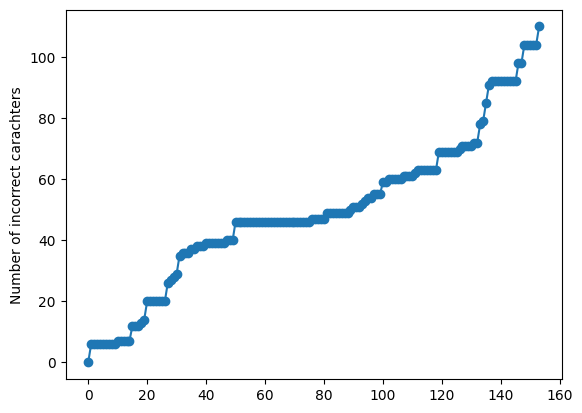

In [ ]:
error_list = [0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
              12, 12, 12, 13, 14, 20, 20, 20, 20, 20, 20,
              20, 26, 27, 28, 29, 35, 36, 36, 36, 37, 37,
              38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40,
              40, 40, 46, 46, 46, 46, 46, 46, 46, 46, 46,
              46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
              46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47,
              49, 49, 49, 49, 49, 49, 49, 49, 50, 51, 51,
              51, 52, 53, 54, 54, 55, 55, 55, 59, 59, 60,
              60, 60, 60, 60, 61, 61, 61, 61, 62, 63, 63,
              63, 63, 63, 63, 63, 69, 69, 69, 69, 69, 69,
              69, 70, 71, 71, 71, 71, 72, 72, 78, 79, 85,
              91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 98,
              98, 104, 104, 104, 104, 104, 110]

count_list = list(range(len(error_list)))


plt.plot(count_list, error_list, marker='o')

plt.ylabel("Number of incorrect carachters")


#confusao de ordem de nodes
#reonhceu stand virtual